## Import Necessary Libraries

In [8]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Import Datasets

In [9]:
turbine_data=pd.read_csv('gas_turbines.csv')
turbine_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


## Data Understanding

In [10]:
turbine_data.shape

(15039, 11)

In [11]:
turbine_data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [12]:
turbine_data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

### Inference :
* The dataset have 11 features and 15039 records

* The datatype of the features are assigned correctly

* The dataset have no null values

## Data Visulaization

<AxesSubplot:xlabel='AT', ylabel='Density'>

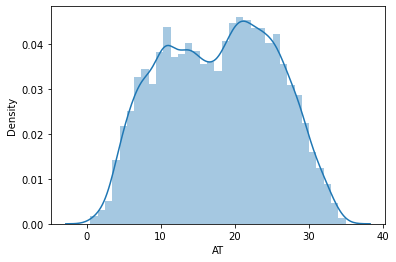

In [13]:
sns.distplot(turbine_data['AT'])

<AxesSubplot:xlabel='AP', ylabel='Density'>

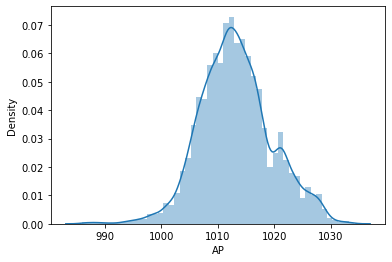

In [14]:
sns.distplot(turbine_data['AP'])

<AxesSubplot:xlabel='AH', ylabel='Density'>

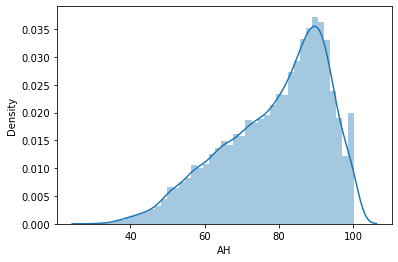

In [15]:
sns.distplot(turbine_data['AH'])

<AxesSubplot:xlabel='AFDP', ylabel='Density'>

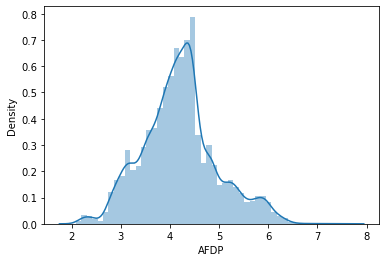

In [16]:
sns.distplot(turbine_data['AFDP'])

<AxesSubplot:xlabel='GTEP', ylabel='Density'>

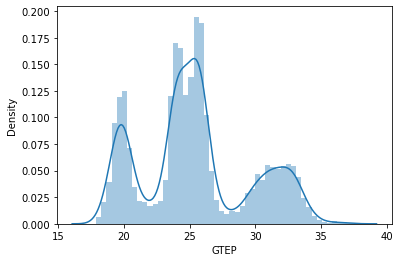

In [17]:
sns.distplot(turbine_data['GTEP'])

<AxesSubplot:xlabel='TIT', ylabel='Density'>

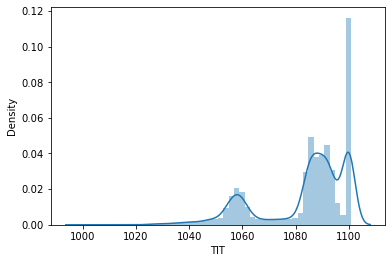

In [18]:
sns.distplot(turbine_data['TIT'])

<AxesSubplot:xlabel='TAT', ylabel='Density'>

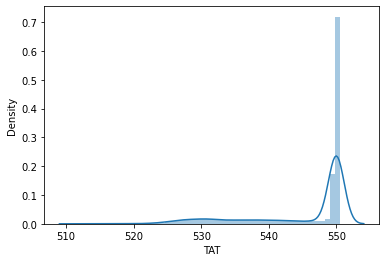

In [19]:
sns.distplot(turbine_data['TAT'])

<AxesSubplot:xlabel='CDP', ylabel='Density'>

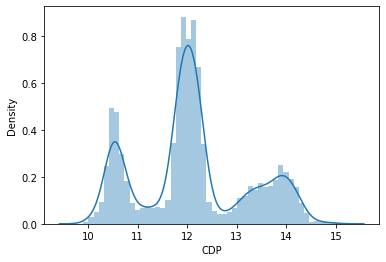

In [20]:
sns.distplot(turbine_data['CDP'])

<AxesSubplot:xlabel='CO', ylabel='Density'>

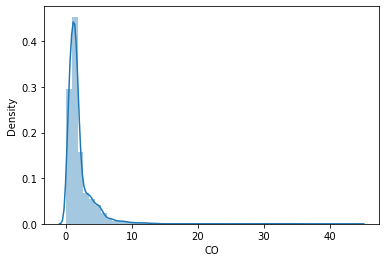

In [21]:
sns.distplot(turbine_data['CO'])

<AxesSubplot:xlabel='NOX', ylabel='Density'>

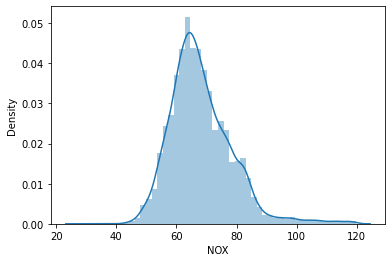

In [22]:
sns.distplot(turbine_data['NOX'])

<AxesSubplot:xlabel='TEY', ylabel='Density'>

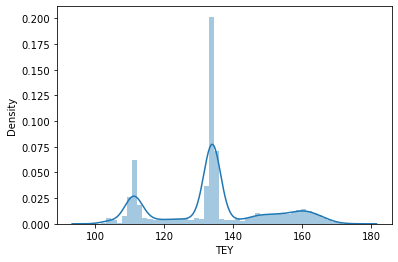

In [23]:
sns.distplot(turbine_data['TEY'])

## Data Preparation

In [24]:
x=turbine_data.drop('TEY',axis=1)
y=turbine_data['TEY']

In [25]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [26]:
from sklearn.preprocessing import StandardScaler
std_model=StandardScaler()

In [27]:
x_transform=std_model.fit_transform(x)

## Model buliding

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_transform,y,test_size=0.2)

In [29]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((12031, 10), (12031,), (3008, 10), (3008,))

## Model training

In [30]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_dim = 10), #I/player
                                    tf.keras.layers.Dense(8,activation = 'relu'), #Hidden layer 1
                                    tf.keras.layers.Dense(1,activation = 'relu')]) #O/p layer

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 8)                 88        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [33]:
model.fit(x=x_train,y=y_train,batch_size=50,epochs=10,verbose=1)

Epoch 1/10
241/241 [==============================] - 1s 874us/step - loss: 17924.5273 - accuracy: 0.0000e+00
Epoch 2/10
241/241 [==============================] - 0s 803us/step - loss: 16826.0625 - accuracy: 0.0000e+00
Epoch 3/10
241/241 [==============================] - 0s 796us/step - loss: 15128.8652 - accuracy: 0.0000e+00
Epoch 4/10
241/241 [==============================] - 0s 779us/step - loss: 13021.3535 - accuracy: 0.0000e+00
Epoch 5/10
241/241 [==============================] - 0s 792us/step - loss: 10587.3545 - accuracy: 0.0000e+00
Epoch 6/10
241/241 [==============================] - 0s 800us/step - loss: 8427.3018 - accuracy: 0.0000e+00
Epoch 7/10
241/241 [==============================] - 0s 792us/step - loss: 6732.7153 - accuracy: 0.0000e+00
Epoch 8/10
241/241 [==============================] - 0s 792us/step - loss: 5398.4141 - accuracy: 0.0000e+00
Epoch 9/10
241/241 [==============================] - 0s 787us/step - loss: 4291.5063 - accuracy: 0.0000e+00
Epoch 10/10
24

## Model testing

In [34]:
y_pred=model.predict(x_test)
y_pred.shape

(3008, 1)

## Model evaluation

In [35]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [36]:
x_test.shape

(3008, 10)

In [44]:
model.evaluate(x_test,y_test,batch_size=50,verbose=1)

61/61 [==============================] - 0s 1ms/step - loss: 2943.6975 - accuracy: 0.0000e+00


[2943.697509765625, 0.0]

In [45]:
mean_squared_error(y_test,y_pred)

2943.6969741846874

In [46]:
mean_squared_error(y_test,y_pred)

2943.6969741846874